# 6 Statistische Modelle - Beispiel für nichtlineare Regressionen
## Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung


* scikit learn - machine learning Bibliothek


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.simplefilter("ignore")

# Datensatz - Metadaten

Wir erzeugen hier selbst mal einen Datensatz mit einer parabolischen Funktion und zusätzlichem Rauschen.


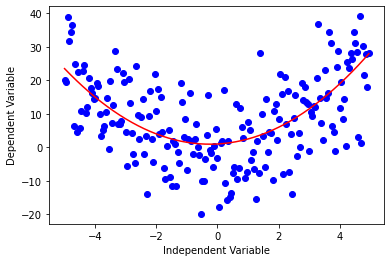

In [2]:
x = np.arange(-5.0, 5.0, 0.05)
 
y = x*x+ 0.5*x+1
y_noise = 10 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# 1. Polynom-Regression

Das reshaping / poly_features führt dazu, dass eine neue Spalte eingeführt wird, welches die Quadratzahl des x-Wertes enthält.

In [56]:
x1 = x.reshape(-1, 1)
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_features.fit_transform(x1)
x_poly[3]

array([-4.85  , 23.5225])

Lineare Regression auf dem quardatischen Datensatz

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, ydata)

LinearRegression()

In [62]:
print('Koeffizienten von x sind', lin_reg.coef_)
print('Intercept ist', lin_reg.intercept_)

Koeffizienten von x sind [0.57491205 1.15604573]
Intercept ist 0.3075597322668404


Das bedeutet ein Modell der Form: y = 1.156 * x^2 + 0.575 * x + 0.308

# Modell-Evaluation

In [68]:
y_deg = lin_reg.predict(x_poly)
mse_deg = mean_squared_error(y, y_deg, squared = True)
r2_deg = r2_score(y, y_deg)
  
print('Root Mean Squared Error (RMSE) der Polynom-Regression: ', mse_deg)
print('R2 score des Modells: ', r2_deg)

RMSE der Polynom-Regression:  1.757550998653508
R2 score des Modells:  0.9692929471320899


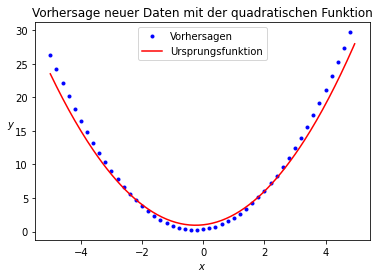

In [67]:
x_new = np.arange(-5.0, 5.0, 0.2)
x_new1 = x_new.reshape(-1, 1)
x_new_poly = poly_features.transform(x_new1)
y_new = lin_reg.predict(x_new_poly)
plt.plot(x_new, y_new, "b.", label='Vorhersagen')
plt.plot(x, y, 'r', label='Ursprungsfunktion')

plt.xlabel("$x$", fontsize = 10)
plt.ylabel("$y$", rotation = 0, fontsize = 10)
plt.legend()
  
plt.title("Vorhersage neuer Daten mit der quadratischen Funktion")
plt.show()

# 2. Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

np.random.seed(42)
X_quad = x1
y_quad = ydata

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'x[0] <= 3.425\nsquared_error = 165.039\nsamples = 200\nvalue = 9.927'),
 Text(0.25, 0.5, 'x[0] <= -3.475\nsquared_error = 124.118\nsamples = 169\nvalue = 7.086'),
 Text(0.125, 0.16666666666666666, 'squared_error = 98.701\nsamples = 31\nvalue = 19.222'),
 Text(0.375, 0.16666666666666666, 'squared_error = 89.31\nsamples = 138\nvalue = 4.36'),
 Text(0.75, 0.5, 'x[0] <= 4.725\nsquared_error = 104.249\nsamples = 31\nvalue = 25.415'),
 Text(0.625, 0.16666666666666666, 'squared_error = 100.349\nsamples = 26\nvalue = 23.655'),
 Text(0.875, 0.16666666666666666, 'squared_error = 24.68\nsamples = 5\nvalue = 34.566')]

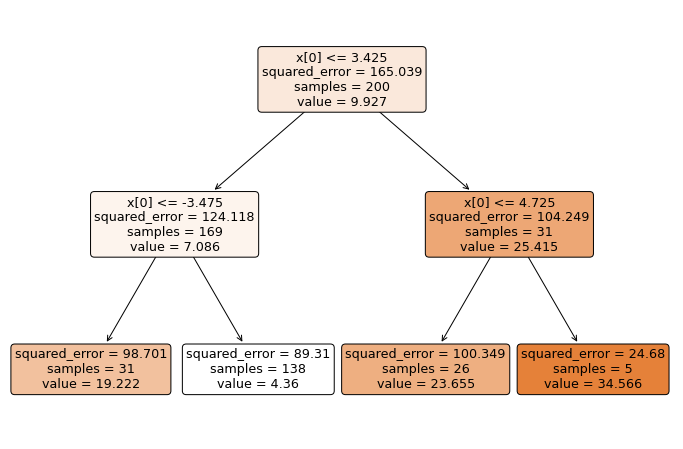

In [73]:
plt.figure(figsize=(12,8))
tree.plot_tree(tree_reg.fit(X_quad, y_quad), filled=True, rounded = True)

In [74]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [75]:
tree_reg.tree_.threshold

array([ 3.42500007, -3.47500002, -2.        , -2.        ,  4.7249999 ,
       -2.        , -2.        ])

In [76]:
tree_reg2.tree_.threshold

array([ 3.42500007, -3.47500002, -4.82500005, -2.        , -2.        ,
        2.32499993, -2.        , -2.        ,  4.7249999 ,  3.625     ,
       -2.        , -2.        ,  4.92499995, -2.        , -2.        ])

## Funktion zur Darstellung der Daten + Modelle

In [92]:
def plot_regression_predictions(tree_reg, X, y, axes=[-5, 5, -20, 60]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r-", linewidth=2, label=r"DT-Modell")

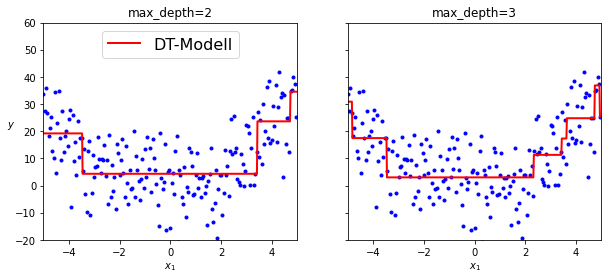

In [93]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X_quad, y_quad)
plt.title("max_depth=3")

plt.show()

In [96]:
y_predn = tree_reg.predict(x1)
r2_dtm = r2_score(y, y_predn)
print('R2 score des DT-Modells mit 2 Schichten: ', r2_dtm)

R2 score des DT-Modells mit 2 Schichten:  0.7042223356546249
